# CNN Topologies

Previously, we have seen that Convolutional Neural Networks are a collection of Convoluitoanl Layers, Max Pooling Layers, and Fully Connected Layers. in this Jupyter Notebook, we will analyze the most famous CNN Network Topologies and we will build them:
<ol>
    <li> <font color=#7C2147>  LeNet-5 </font> </li>
    <li> <font color=#361F78>  AlexNet </font> </li>
</ol>


<font color=#7C2147>  
## LeNet-5 
</font>

### History
LeNet5 was one of the earliest convolutional neural networks and promoted the development of deep learning. Since 1988, after years of research and many successful iterations, the pioneering work has been named LeNet5.

In 1989, Yann LeCun et al. at Bell Labs first applied the backpropagation algorithm to practical applications, and believed that the ability to learn network generalization could be greatly enhanced by providing constraints from the task's domain. He combined a convolutional neural network trained by backpropagation algorithms to read handwritten numbers and successfully applied it in identifying handwritten zip code numbers provided by the US Postal Service. This was the prototype of what later came to be called LeNet.In the same year, LeCun described a small handwritten digit recognition problem in another paper, and showed that even though the problem is linearly separable, single-layer networks exhibited poor generalization capabilities. When using shift-invariant feature detectors on a multi-layered, constrained network, the model could perform very well. He believed that these results proved that minimizing the number of free parameters in the neural network could enhance the generalization ability of the neural network

### Architecture
LeNet-5 CNN architecture is made up of 7 layers. The layer composition consists of 3 convolutional layers, 2 subsampling layers and 2 fully connected layers.
The goal of LeNet-5 was to recognize handwritten digits, it was trained on grayscale images (32 by 32 by 1) . 

![LeNet-5](utils\lenet5.jpg)

We will implement this architecture using Tensorflow2, however it is expected that you know how to use it, If you are new to Tensorflow2 visit my Tutorials on Tensorflow2 Sequential API

To make our lives easier we will turn the LeNEt-5 input into 28x28x1

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input,Conv2D,AveragePooling2D,Flatten,Dense
print(tf.__version__)

2.3.0


In [2]:
def get_data_stat(X,y,sets="train"):
    print(f"X_{sets} shape: {X.shape}, type: {type(X)}")
    print(f"y_{sets} shape: {y.shape}, type: {type(y)}")
    print()
    
from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("Summary:")
get_data_stat(X_train,y_train,sets="train")
get_data_stat(X_test,y_test,sets="test")

Summary:
X_train shape: (60000, 28, 28), type: <class 'numpy.ndarray'>
y_train shape: (60000,), type: <class 'numpy.ndarray'>

X_test shape: (10000, 28, 28), type: <class 'numpy.ndarray'>
y_test shape: (10000,), type: <class 'numpy.ndarray'>



In [3]:
def get_LeNet5():
    """ LeNet-5 architecture with relu activation an sofmtax output"""
    
    inputs = Input(shape=(28,28,1))
    h = Conv2D(filters=6,kernel_size=(5,5),strides=(1,1), padding='valid',activation="relu",name="Conv1")(inputs)
    h = AveragePooling2D(pool_size=(2, 2), strides=(2,2), padding='valid',name="Avgpool1")(h)
    h = Conv2D(filters=16,kernel_size=(5,5),strides=(1,1),padding='valid',activation="relu",name="Conv2")(h)
    h = AveragePooling2D(pool_size=(2, 2), strides=(2,2), padding='valid',name="Avgpool2")(h)
    
    ### fully connected ###
    h = Flatten(name="flatten")(h)
    h = Dense(units=120,activation="relu",name="Dense1")(h)
    h = Dense(units=84,activation="relu",name="Dense2")(h)
    outputs = Dense(units=10,activation="softmax",name="Dense3")(h)
    
    model = tf.keras.models.Model(inputs=inputs,outputs=outputs,name="LeNet-5")
    
    return model

def compile_model(model):
    """ Compile model with Adam optimizer"""
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005)
    model.compile(optimizer=optimizer,loss="sparse_categorical_crossentropy",metrics=["accuracy"])
    
def train(model,X,y,epochs=10):
    """ Train model with Early Stopping"""
    earlystopping = tf.keras.callbacks.EarlyStopping(patience=4)
    history = model.fit(x=X, y=y, batch_size=64, epochs=epochs, verbose=1, callbacks=[earlystopping],validation_split=0.2)
    return history

def evaluate(model,X,y):
    """ Evaluate model """
    return model.evaluate(x=X, y=y, batch_size=64, verbose=1)

def predict(model,X):
    """ Make predictions with model """
    return model.predict(x=X, batch_size=64, verbose=0)

def plot_history(history):
    """ Plot trainning history"""
    ### Create subplots###
    figure, axis = plt.subplots(ncols=2,nrows=1,figsize=(14,6))
    
    ### PLot loss ###
    axis[0].set_title("epochs vs loss")
    axis[0].set_xlabel("epochs")
    axis[0].set_ylabel("loss")
    axis[0].plot(history.history["loss"],label="train loss")
    axis[0].plot(history.history["val_loss"],label="Val_loss")
    axis[0].legend()
    
    ### Plot accuracy ###
    axis[1].set_title("epochs vs accuracy")
    axis[1].set_xlabel("epochs")
    axis[1].set_ylabel("loss")
    axis[1].plot(history.history["accuracy"],label="train accuracy")
    axis[1].plot(history.history["val_accuracy"],label="Val_accuracy")
    axis[1].legend()
    
def show_predictions(X_test,y_test,y_hat,n=5):
    """ Show predictions with probability """
    index = np.random.randint(0,len(y_test),n)
    for i in index:
        #### Get information about prediction ####
        label      = y_test[i]
        prediction = y_hat[i]
        ticks      = np.arange(len(prediction))
        label_pre  = np.argmax(y_hat[i])
        probability= str(max(y_hat[i]))[0:5]
        
        ### Plot Number ###
        figure,axis = plt.subplots(ncols=2,nrows=1,figsize=(12,3),gridspec_kw={'width_ratios': [2,1.5]})
        axis[0].set_title(f"Number labeled as: {label}")
        axis[0].imshow(X_test[i])
        axis[0].axis("off")
        
        ### Plot Probabilites ###
        axis[1].set_title(f"predicted as {label_pre} with probability {probability} %")
        axis[1].bar(ticks,prediction)
        axis[1].set_xticks(ticks)
        plt.show()

Epoch 1/10
750/750 [==============================] - 21s 28ms/step - loss: 0.5235 - accuracy: 0.8875 - val_loss: 0.1636 - val_accuracy: 0.9507
Epoch 2/10
750/750 [==============================] - 21s 28ms/step - loss: 0.1191 - accuracy: 0.9640 - val_loss: 0.1077 - val_accuracy: 0.9691
Epoch 3/10
750/750 [==============================] - 21s 28ms/step - loss: 0.0804 - accuracy: 0.9744 - val_loss: 0.0962 - val_accuracy: 0.9716
Epoch 4/10
750/750 [==============================] - 21s 28ms/step - loss: 0.0622 - accuracy: 0.9808 - val_loss: 0.0803 - val_accuracy: 0.9766
Epoch 5/10
750/750 [==============================] - 20s 27ms/step - loss: 0.0524 - accuracy: 0.9832 - val_loss: 0.0936 - val_accuracy: 0.9722
Epoch 6/10
750/750 [==============================] - 19s 26ms/step - loss: 0.0418 - accuracy: 0.9864 - val_loss: 0.0791 - val_accuracy: 0.9778
Epoch 7/10
750/750 [==============================] - 21s 28ms/step - loss: 0.0356 - accuracy: 0.9882 - val_loss: 0.0622 - val_accuracy:

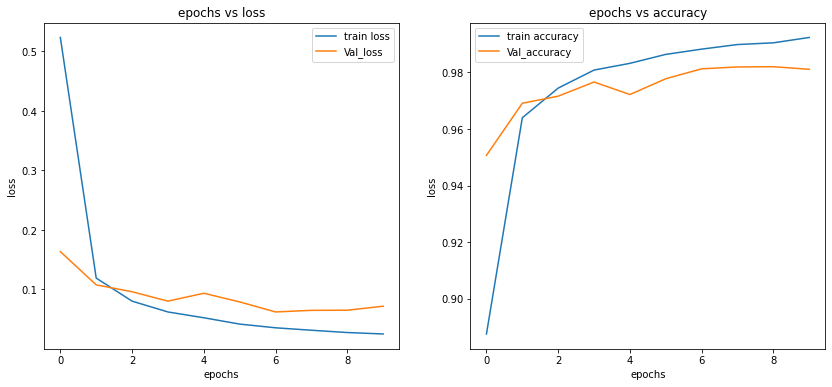

In [4]:
LeNet5 = get_LeNet5()
compile_model(LeNet5)
## we set X_train[...,np.newaxis] since the shape expected is (none,28,28,1)
history = train(LeNet5,X=X_train[...,np.newaxis],y=y_train,epochs=10)
plot_history(history)

In [5]:
eval_loss,eval_accuracy = evaluate(LeNet5,X_test[...,np.newaxis],y_test)
print("Evaluation on Train set:")
print(f"Loss: {eval_loss}, Accuracy: {eval_accuracy}")

y_hat = predict(LeNet5,X=X_test)

157/157 [==============================] - 2s 10ms/step - loss: 0.0630 - accuracy: 0.9825
Evaluation on Train set:
Loss: 0.06300892680883408, Accuracy: 0.9825000166893005


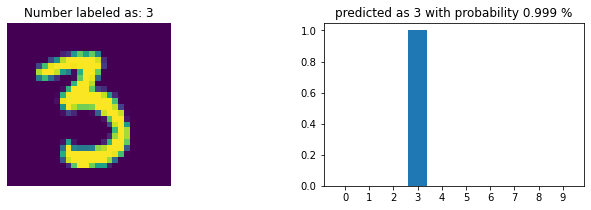

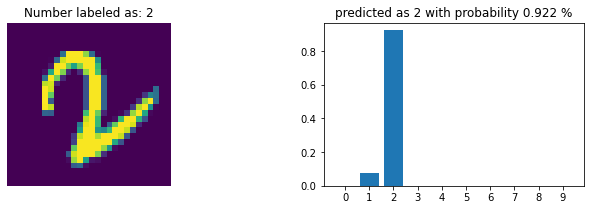

In [6]:
show_predictions(X_test,y_test,y_hat,n=2)

### Visualizaing leNET5

In [74]:
def make_prediction_from_image(model,img_path='utils/six.png'):
    """ Make predictions on images (improted from paint)"""
    from tensorflow.keras.preprocessing import image
    # path to image
    img_a = image.load_img(img_path, color_mode="grayscale", target_size=(28, 28)) # Load image and reshape it
    img = image.img_to_array(img_a)     # Convert Image to numpy array
    img = np.expand_dims(img, axis=0)   # Add batch (1)   size               
    img = np.expand_dims(img, axis=3)   # Add 1 channnel (B&W)
    prediction = model.predict(x=img, verbose=0) # Make_prediction
    return img_a, prediction


def get_random_train_example():
    """ Selects and displays random train example"""
    x_s = X_train[np.random.randint(0,X_train.shape[0]),:,:] # Get an example 
    plt.imshow(x_s)                     # Plot it 
    ### Proces example so that tensorflow can make predictions with ti ###
    x_s= np.expand_dims(x_s, axis=0)    # Add batch (1)   size               
    x_s = np.expand_dims(x_s, axis=3)   # Add 1 channnel (B&W)
    x_s.shape
    
    return x_s

def get_visualizer(model):
    """ Get all the output layers in order to visualize what the Neural Network is doing """
    model_input  = model.input    # Define input as model input
    model_layers = model.layers   # Define output as all layers 
    
    #### Extract the output Tensors of all Layers ###
    layer_outputs = [layer.output for layer in model_layers ] 

    ### Define Model ###
    features = tf.keras.models.Model(inputs=LeNet5_input, outputs=layer_outputs) 
    
    return features


def visualize_model(extacted_features,n,ncols,nrows):
    """ Visualize model with plots deepnds on get_visualizer """
    conv = extacted_features[n] # Get tensor of nth layer
    N = conv.shape[3]            # The third element is the number of filters
    print(f"Layer's shape: {conv.shape}")
    ### Create Subplots ###
    figure, axes = plt.subplots(ncols=ncols,nrows=nrows,figsize=(20,10))
    ax= axes.flatten() # Flatten axes so we can iterate over them smoothly 

    for i in range(0,N):
        ax[i].imshow(conv[0,:,:,i])
        ax[i].set_title(f"Activation of output {i}")
        ax[i].axis("off")

image predicted as :1


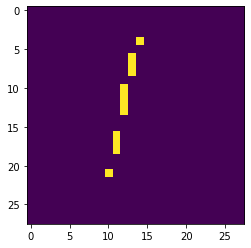

In [81]:
### MAke prediction from photos ###
im,probs=make_prediction_from_image(model=LeNet5,img_path='utils/one.png')
print(f"image predicted as :{np.argmax(probs)}")
plt.imshow(im)
plt.show()

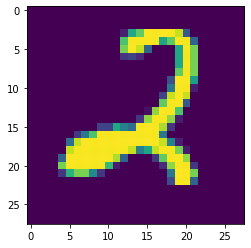

In [83]:
x_s = get_random_train_example()

Conv1 Layer
Layer's shape: (1, 24, 24, 6)


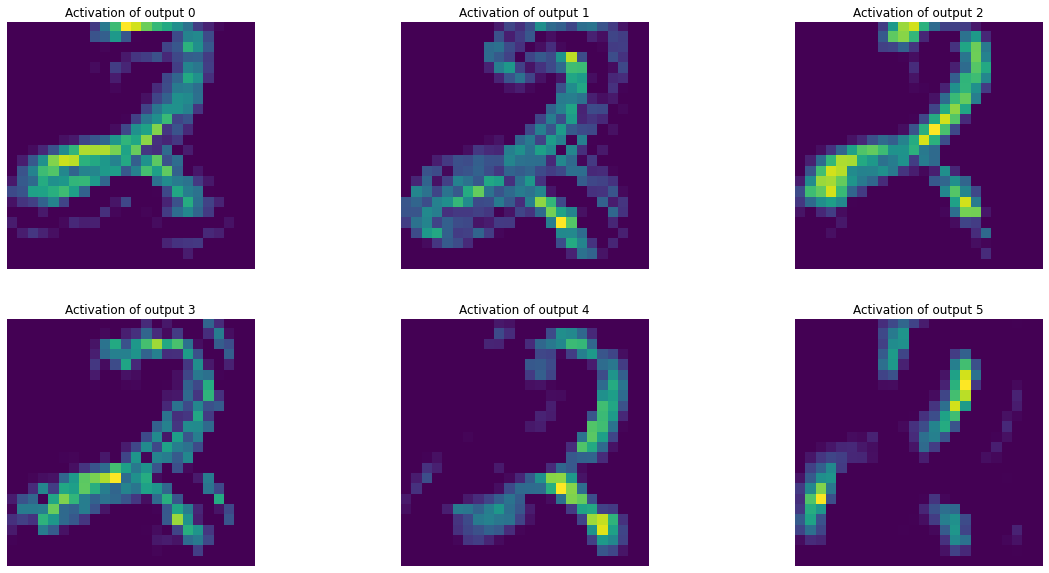

In [84]:
features = get_visualizer(LeNet5) # Get the output of model's layers
extacted_features = features(x_s) # this returns a list of feedforwad of all layer   
print("Conv1 Layer")
visualize_model(extacted_features,n=1,ncols=3,nrows=2) # Visualize Conv1 layer


Conv2 Layer
Layer's shape: (1, 8, 8, 16)


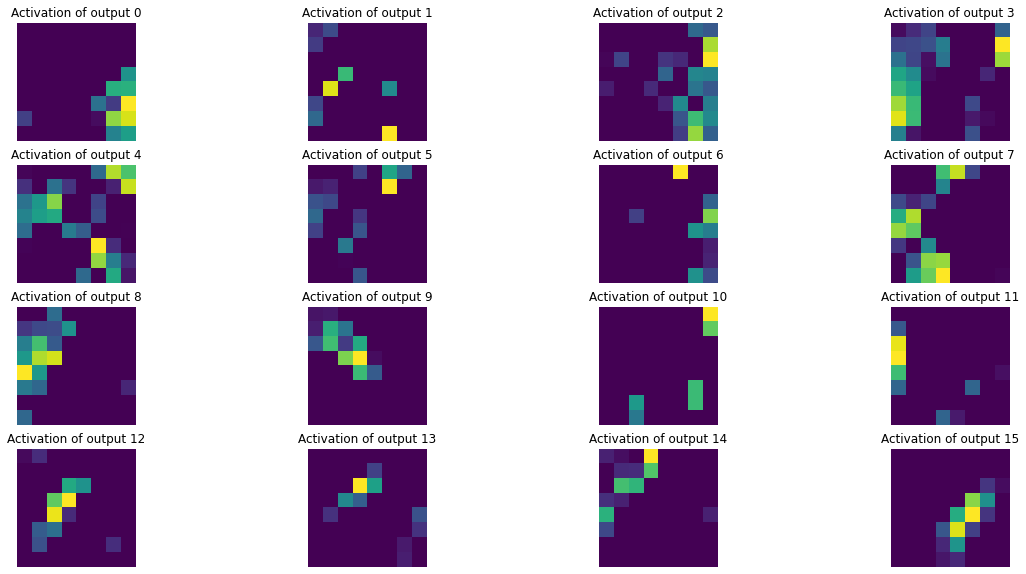

In [62]:
print("Conv2 Layer")
visualize_model(extacted_features,n=3,ncols=4,nrows=4) # Visualzie Conv2 layer

<font color=#361F78>  
## AlexNet
</font> 

### History
AlexNet was designed by Alex Krizhevsky, and published with Ilya Sutskever and Krizhevsky's doctoral advisor Geoffrey Hinton.
AlexNet competed in the ImageNet Large Scale Visual Recognition Challenge on September 30, 2012. The network achieved a top-5 error of 15.3%, more than 10.8 percentage points lower than that of the runner up. The original paper's primary result was that the depth of the model was essential for its high performance, which was computationally expensive, but made feasible due to the utilization of graphics processing units (GPUs) during training.

AlexNet was not the first fast GPU-implementation of a CNN to win an image recognition contest. A CNN on GPU by K. Chellapilla et al. (2006) was 4 times faster than an equivalent implementation on CPU. A deep CNN of Dan Cireșan et al. (2011) at IDSIA was already 60 times faster and achieved superhuman performance in August 2011. Between May 15, 2011 and September 10, 2012, their CNN won no fewer than four image competitions. They also significantly improved on the best performance in the literature for multiple image databases.

### Architecture 

Alexnet has an input tenosr of $227x117x3$ and an output of $1000$ classes and it was trained in the imagenet database.

![Alex](utils\alexnet.png)

**Note:**

<br>
we will build the model however we will not train it. Instead we will load the Weights to illustrate the power of Transfer learning.

In [90]:
from tensorflow.keras.layers import MaxPooling2D
def get_AlexNet():
    """ LeNet-5 architecture with relu activation an sofmtax output"""
    
    inputs = Input(shape=(227,227,3))
    h = Conv2D(filters=96,kernel_size=(11,11),strides=(4,4), padding='valid',activation="relu",name="Conv1")(inputs)
    h = MaxPooling2D(pool_size=(3, 3), strides=(2,2), padding='valid',name="Maxpool1")(h)
    h = Conv2D(filters=256,kernel_size=(5,5),strides=(1,1),padding='same',activation="relu",name="Conv2")(h)
    h = MaxPooling2D(pool_size=(3, 3), strides=(2,2), padding='valid',name="Maxpool2")(h)
    h = Conv2D(filters=384,kernel_size=(3,3),strides=(1,1),padding='same',activation="relu",name="Conv3")(h)
    h = Conv2D(filters=384,kernel_size=(3,3),strides=(1,1),padding='same',activation="relu",name="Conv4")(h)
    h = Conv2D(filters=256,kernel_size=(3,3),strides=(1,1),padding='same',activation="relu",name="Conv5")(h)
    h = MaxPooling2D(pool_size=(3, 3), strides=(2,2), padding='valid',name="Maxpool3")(h)   
    
    ### fully connected ###
    h = Flatten(name="flatten")(h)
    h = Dense(units=9216,activation="relu",name="Dense1")(h)
    h = Dense(units=4096,activation="relu",name="Dense2")(h)
    h = Dense(units=4096,activation="relu",name="Dense3")(h)
    outputs = Dense(units=1000,activation="softmax",name="Dense4")(h)
    
    model = tf.keras.models.Model(inputs=inputs,outputs=outputs,name="AlexNet")
    
    return model

In [91]:
AlexNet = get_AlexNet()
AlexNet.summary()

Model: "AlexNet"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 227, 227, 3)]     0         
_________________________________________________________________
Conv1 (Conv2D)               (None, 55, 55, 96)        34944     
_________________________________________________________________
Maxpool1 (MaxPooling2D)      (None, 27, 27, 96)        0         
_________________________________________________________________
Conv2 (Conv2D)               (None, 27, 27, 256)       614656    
_________________________________________________________________
Maxpool2 (MaxPooling2D)      (None, 13, 13, 256)       0         
_________________________________________________________________
Conv3 (Conv2D)               (None, 13, 13, 384)       885120    
_________________________________________________________________
Conv4 (Conv2D)               (None, 13, 13, 384)       1327